# Занятие 11. Проект построения модели машинного обучения для регрессии

### 1. Problem Definition, Loading the libraries and the dataset

In [69]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
filename = "qsar_fish_toxicity.csv"
names = ['CIC0',
         'SM1_Dz(Z)',
         'GATS1i', 'NdsCH','NdssC', 'MLOGP', 'quantitative response, LC50 [-LOG(mol/L)]']
dataset = read_csv(filename, names=names, sep=';')
print(len(names))

7


*MLOGP (молекулярные свойства),*
CIC0 (информационные индексы), 
GATS1i (двумерные автокорреляции), 
NdssC (подсчеты атомного типа), 
NdsCH ((подсчеты атомного типа), 
SM1_Dz (Z)
(двумерная матрица- Подробности можно найти в цитируемой ссылке: M. Cassotti, D. Ballabio, R. Todeschini, V. Consonni

https://archive.ics.uci.edu/ml/datasets/QSAR+fish+toxicity

### 2. Analyze Data

#### Descriptive statistics

In [71]:
# shape
print(dataset.shape)

(908, 7)


In [72]:
# types
dataset.dtypes

CIC0                                         float64
SM1_Dz(Z)                                    float64
GATS1i                                       float64
NdsCH                                          int64
NdssC                                          int64
MLOGP                                        float64
quantitative response, LC50 [-LOG(mol/L)]    float64
dtype: object

In [73]:
# head
dataset.head(20)

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,"quantitative response, LC50 [-LOG(mol/L)]"
0,3.26,0.83,1.68,0,1,1.45,3.77
1,2.19,0.58,0.86,0,0,1.35,3.12
2,2.12,0.64,0.83,0,0,1.35,3.53
3,3.03,0.33,1.47,1,0,1.81,3.51
4,2.09,0.83,0.86,0,0,1.89,5.39
5,3.22,0.33,2.18,0,0,0.71,1.82
6,3.18,0.00,1.06,0,0,2.94,3.95
7,3.00,0.00,0.94,1,0,2.85,3.51
8,2.62,0.50,0.99,0,0,2.94,4.40
9,2.83,0.13,0.95,0,0,1.59,3.02


In [74]:
# descriptions
set_option('precision', 1)
dataset.describe()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,"quantitative response, LC50 [-LOG(mol/L)]"
count,908.0,908.0,908.0,908.0,908.0,908.0,9.1e+02
mean,2.9,0.6,1.3,0.2,0.5,2.1,4.1e+00
std,0.8,0.4,0.4,0.6,0.9,1.4,1.5e+00
min,0.7,0.0,0.4,0.0,0.0,-2.9,5.3e-02
25%,2.3,0.2,1.0,0.0,0.0,1.2,3.2e+00
50%,2.9,0.6,1.2,0.0,0.0,2.1,4.0e+00
75%,3.4,0.9,1.6,0.0,1.0,3.1,4.9e+00
max,5.9,2.2,2.9,4.0,6.0,6.5,9.6e+00


In [75]:
# correlation
set_option('precision', 2)
dataset.corr(method='pearson')

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,"quantitative response, LC50 [-LOG(mol/L)]"
CIC0,1.00,-0.24,0.15,0.12,0.25,0.46,0.29
SM1_Dz(Z),-0.24,1.00,-0.15,-0.14,0.16,0.20,0.41
GATS1i,0.15,-0.15,1.00,-0.01,0.09,-0.45,-0.40
NdsCH,0.12,-0.14,-0.01,1.00,0.19,0.05,0.17
NdssC,0.25,0.16,0.09,0.19,1.00,0.03,0.17
MLOGP,0.46,0.20,-0.45,0.05,0.03,1.00,0.65
"quantitative response, LC50 [-LOG(mol/L)]",0.29,0.41,-0.40,0.17,0.17,0.65,1.00


#### Data Visualizations

##### Unimodal Data Visualizations

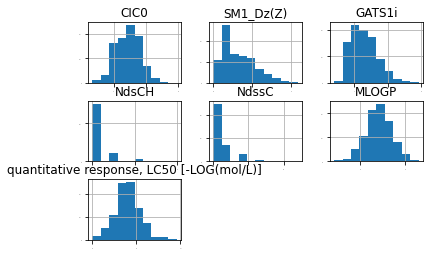

In [76]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

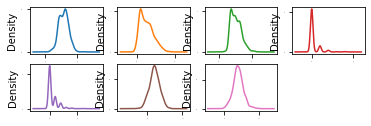

In [77]:
# density
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False,
fontsize=1)
pyplot.show()

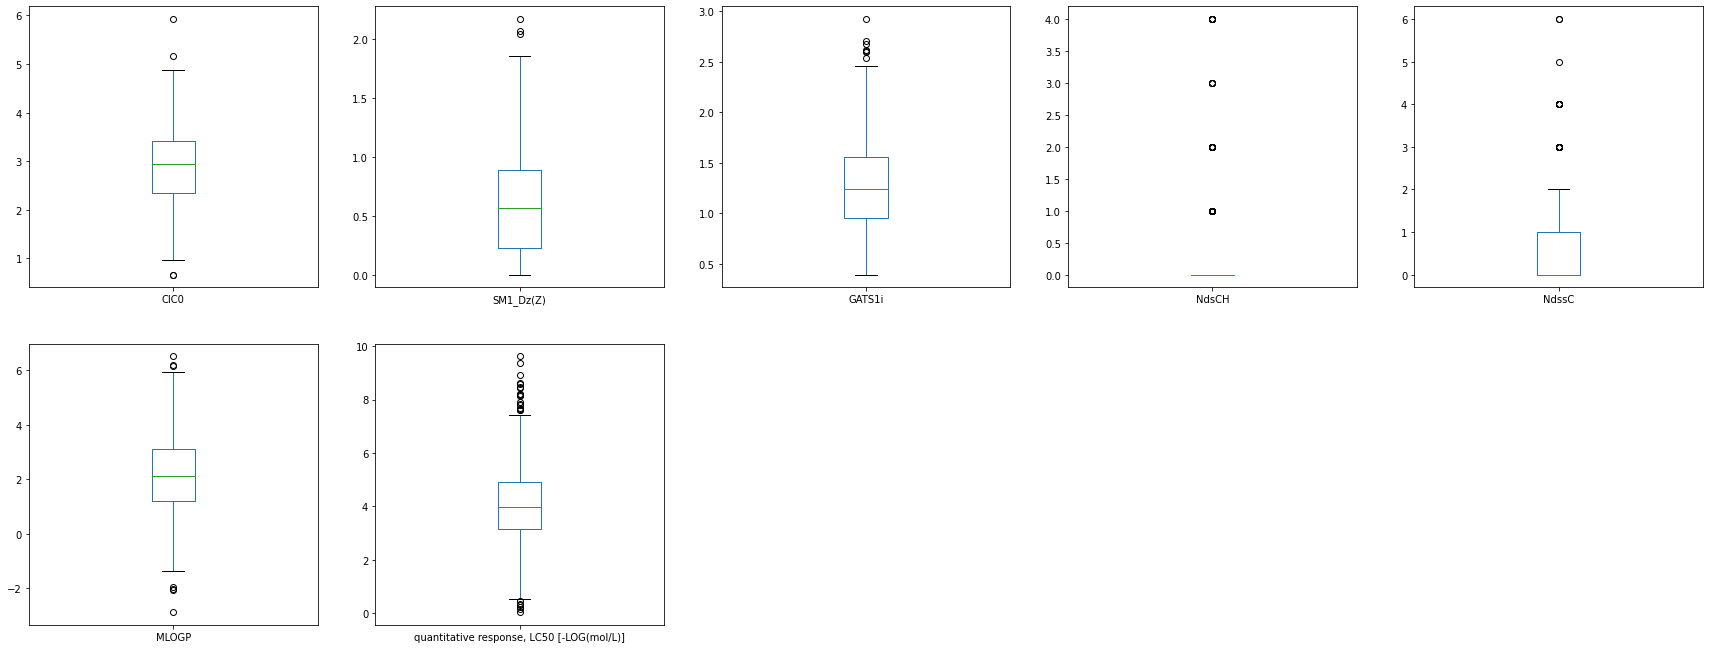

In [78]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False,figsize=(30, 30))
pyplot.show()

##### Multimodal Data Visualizations

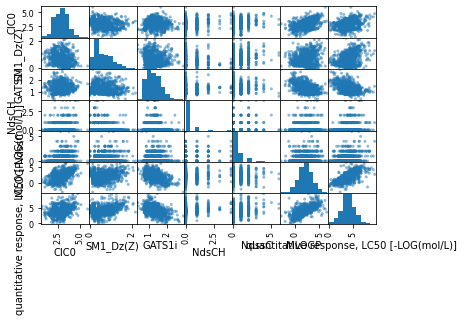

In [79]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

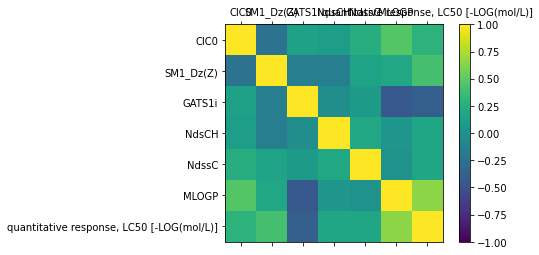

In [80]:
correlations = dataset.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,len(names),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

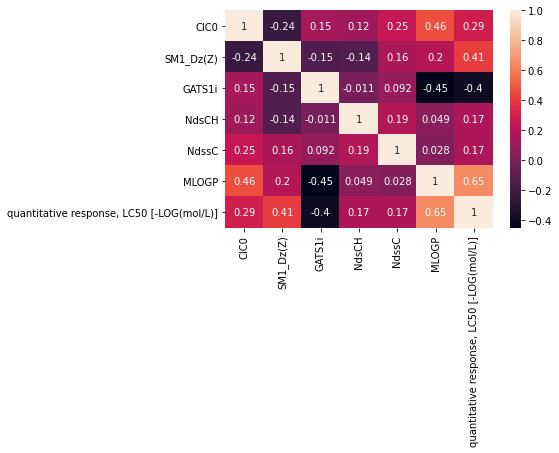

In [81]:
sns.heatmap(dataset.corr(), annot = True)
plt.show()

### 4. Evaluate Algorithms: Baseline

In [86]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [87]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.916897 (0.353052)
LASSO: -1.624069 (0.362269)
EN: -1.368735 (0.315058)
KNN: -0.989808 (0.271946)
CART: -1.191615 (0.298245)
SVR: -0.840032 (0.316354)


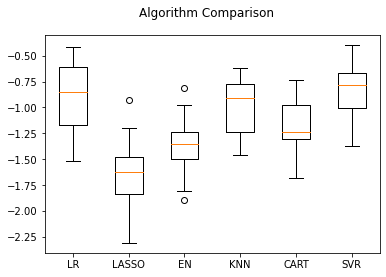

In [88]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### 5. Evaluate Algorithms: Standardize Data

In [89]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.916897 (0.353052)
ScaledLASSO: -2.105198 (0.428256)
ScaledEN: -1.575355 (0.346600)
ScaledKNN: -0.894134 (0.261414)
ScaledCART: -1.214990 (0.305804)
ScaledSVR: -0.846445 (0.291080)


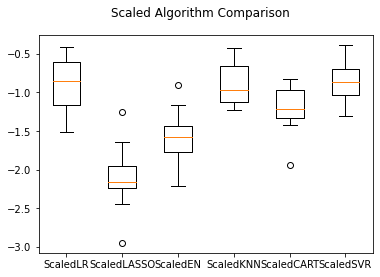

In [90]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### 6. Algorithm Tuning

In [91]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.864076 using {'n_neighbors': 7}
-1.264168 (0.290478) with: {'n_neighbors': 1}
-0.968391 (0.310517) with: {'n_neighbors': 3}
-0.891479 (0.260866) with: {'n_neighbors': 5}
-0.864076 (0.283788) with: {'n_neighbors': 7}
-0.877344 (0.302643) with: {'n_neighbors': 9}
-0.884386 (0.332367) with: {'n_neighbors': 11}
-0.878734 (0.334949) with: {'n_neighbors': 13}
-0.868062 (0.346933) with: {'n_neighbors': 15}
-0.877437 (0.348305) with: {'n_neighbors': 17}
-0.866233 (0.346778) with: {'n_neighbors': 19}
-0.887134 (0.359358) with: {'n_neighbors': 21}


### 7. Ensemble Methods

In [92]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor(n_estimators=10))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor(n_estimators=10))])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -0.903267 (0.232525)
ScaledGBM: -0.827016 (0.201282)
ScaledRF: -0.877282 (0.267317)
ScaledET: -0.855730 (0.209852)


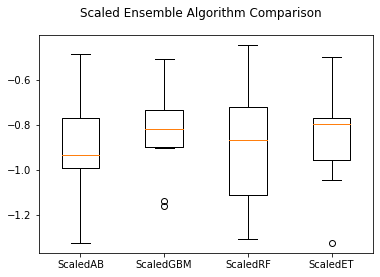

In [93]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [94]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [95]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.815068 using {'n_estimators': 50}
-0.815068 (0.229654) with: {'n_estimators': 50}
-0.817109 (0.194429) with: {'n_estimators': 100}
-0.825645 (0.186778) with: {'n_estimators': 150}
-0.832031 (0.183211) with: {'n_estimators': 200}
-0.838319 (0.182945) with: {'n_estimators': 250}
-0.844310 (0.190519) with: {'n_estimators': 300}
-0.844816 (0.193211) with: {'n_estimators': 350}
-0.846133 (0.188585) with: {'n_estimators': 400}


### 8. Finalize Model

In [96]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(n_estimators=400, random_state=7)

In [97]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

1.0486163465072216


In [ ]:
#классификация 
filename = "banknote_authentication.csv"
names = ['дисперсия',
         'асимметрия',
         'эксцесс', 'энтропия','класс']
dataset = read_csv(filename, names=names, sep=';')
print(len(names))

In [ ]:
# pip install scikit-learn
import csv
import random

from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# model = Perceptron()
# model = svm.SVC()
# model = KNeighborsClassifier(n_neighbors=1)
model = GaussianNB()

# Read data in from file
with open("banknote_authentication.csv") as f:
    reader = csv.reader(f)
    next(reader)

    data = []
    for row in reader:
        data.append({
            "evidence": [float(cell) for cell in row[:4]],
            "label": "Authentic" if row[4] == "0" else "Counterfeit"
        })

# Separate data into training and testing groups
holdout = int(0.40 * len(data))
random.shuffle(data)
testing = data[:holdout]
training = data[holdout:]

# Train model on training set
X_training = [row["evidence"] for row in training]
y_training = [row["label"] for row in training]
model.fit(X_training, y_training)

# Make predictions on the testing set
X_testing = [row["evidence"] for row in testing]
y_testing = [row["label"] for row in testing]
predictions = model.predict(X_testing)

# Compute how well we performed
correct = 0
incorrect = 0
total = 0
for actual, predicted in zip(y_testing, predictions):
    total += 1
    if actual == predicted:
        correct += 1
    else:
        incorrect += 1

# Print results
print(f"Results for model {type(model).__name__}")
print(f"Correct: {correct}")
print(f"Incorrect: {incorrect}")
print(f"Accuracy: {100 * correct / total:.2f}%")

In [ ]:
# pip install scikit-learn
import csv
import random

from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# model = Perceptron()
# model = svm.SVC()
model = KNeighborsClassifier(n_neighbors=1)
# model = GaussianNB()

# Read data in from file
with open("banknote_authentication.csv") as f:
    reader = csv.reader(f)
    next(reader)

    data = []
    for row in reader:
        data.append({
            "evidence": [float(cell) for cell in row[:4]],
            "label": "Authentic" if row[4] == "0" else "Counterfeit"
        })

# Separate data into training and testing groups
holdout = int(0.40 * len(data))
random.shuffle(data)
testing = data[:holdout]
training = data[holdout:]

# Train model on training set
X_training = [row["evidence"] for row in training]
y_training = [row["label"] for row in training]
model.fit(X_training, y_training)

# Make predictions on the testing set
X_testing = [row["evidence"] for row in testing]
y_testing = [row["label"] for row in testing]
predictions = model.predict(X_testing)

# Compute how well we performed
correct = 0
incorrect = 0
total = 0
for actual, predicted in zip(y_testing, predictions):
    total += 1
    if actual == predicted:
        correct += 1
    else:
        incorrect += 1

# Print results
print(f"Results for model {type(model).__name__}")
print(f"Correct: {correct}")
print(f"Incorrect: {incorrect}")
print(f"Accuracy: {100 * correct / total:.2f}%")

In [ ]:
# pip install scikit-learn
import csv
import random

from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# model = Perceptron()
model = svm.SVC()
# model = KNeighborsClassifier(n_neighbors=1)
# model = GaussianNB()

# Read data in from file
with open("banknote_authentication.csv") as f:
    reader = csv.reader(f)
    next(reader)

    data = []
    for row in reader:
        data.append({
            "evidence": [float(cell) for cell in row[:4]],
            "label": "Authentic" if row[4] == "0" else "Counterfeit"
        })

# Separate data into training and testing groups
holdout = int(0.40 * len(data))
random.shuffle(data)
testing = data[:holdout]
training = data[holdout:]

# Train model on training set
X_training = [row["evidence"] for row in training]
y_training = [row["label"] for row in training]
model.fit(X_training, y_training)

# Make predictions on the testing set
X_testing = [row["evidence"] for row in testing]
y_testing = [row["label"] for row in testing]
predictions = model.predict(X_testing)

# Compute how well we performed
correct = 0
incorrect = 0
total = 0
for actual, predicted in zip(y_testing, predictions):
    total += 1
    if actual == predicted:
        correct += 1
    else:
        incorrect += 1

# Print results
print(f"Results for model {type(model).__name__}")
print(f"Correct: {correct}")
print(f"Incorrect: {incorrect}")
print(f"Accuracy: {100 * correct / total:.2f}%")

In [ ]:
# pip install scikit-learn
import csv
import random

from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

model = Perceptron()
# model = svm.SVC()
# model = KNeighborsClassifier(n_neighbors=1)
# model = GaussianNB()

# Read data in from file
with open("banknote_authentication.csv") as f:
    reader = csv.reader(f)
    next(reader)

    data = []
    for row in reader:
        data.append({
            "evidence": [float(cell) for cell in row[:4]],
            "label": "Authentic" if row[4] == "0" else "Counterfeit"
        })

# Separate data into training and testing groups
holdout = int(0.40 * len(data))
random.shuffle(data)
testing = data[:holdout]
training = data[holdout:]

# Train model on training set
X_training = [row["evidence"] for row in training]
y_training = [row["label"] for row in training]
model.fit(X_training, y_training)

# Make predictions on the testing set
X_testing = [row["evidence"] for row in testing]
y_testing = [row["label"] for row in testing]
predictions = model.predict(X_testing)

# Compute how well we performed
correct = 0
incorrect = 0
total = 0
for actual, predicted in zip(y_testing, predictions):
    total += 1
    if actual == predicted:
        correct += 1
    else:
        incorrect += 1

# Print results
print(f"Results for model {type(model).__name__}")
print(f"Correct: {correct}")
print(f"Incorrect: {incorrect}")
print(f"Accuracy: {100 * correct / total:.2f}%")